In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 24 18:49:12 2019

@author: Leo
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
price = pd.read_excel('data_source/four_assets.xlsx',index_col='day')
price=price.dropna()
price.head()

,gold,hs300,cyb,bond
day,,,,
2014-12-08,2.379,1.1994,1.7395,100.000
2014-12-09,2.413,1.2466,1.6726,101.000
2014-12-10,2.471,1.1925,1.7454,99.600
2014-12-11,2.442,1.2361,1.7612,99.800
2014-12-12,2.439,1.2229,1.7994,98.839


Text(0.5, 1.0, 'bond ETF')

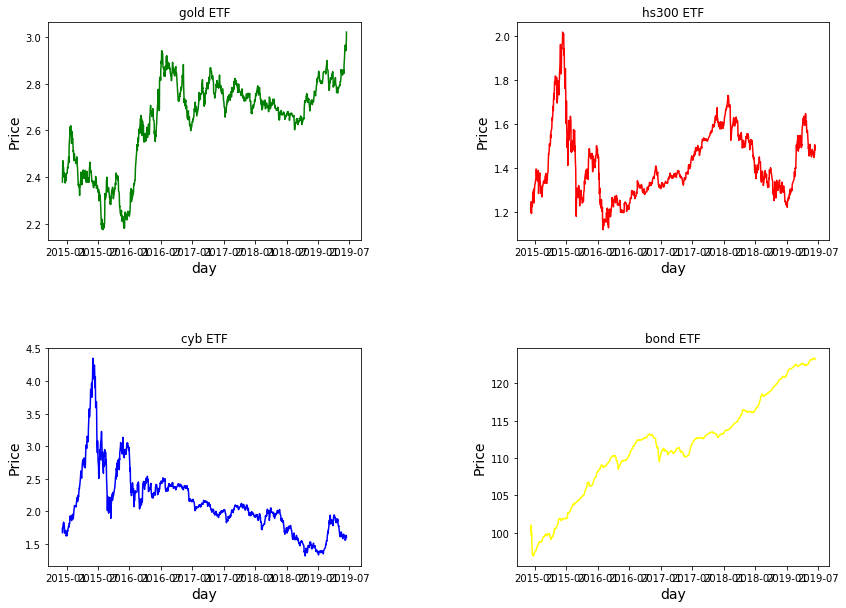

In [3]:
%matplotlib inline
fig1 =plt.figure(figsize=(14,10)) #图像长宽设置
plt.subplots_adjust(hspace=.5,wspace=.5) # 图与图之间距离设置
plt.subplot(221) #2*2的图形排列，共4个位置，这是第1个图
ax = plt.gca() #获取当前子图 gca 代表Get Current Axes
ax.plot(price['gold'], color = 'green')
ax.set_xlabel('day',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('gold ETF')

plt.subplots_adjust(hspace=.5,wspace=.5) 
plt.subplot(222) 
ax = plt.gca() 
ax.plot(price['hs300'], color = 'red')
ax.set_xlabel('day',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('hs300 ETF')

plt.subplots_adjust(hspace=.5,wspace=.5) 
plt.subplot(223) 
ax = plt.gca() 
ax.plot(price['cyb'], color = 'blue')
ax.set_xlabel('day',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('cyb ETF')

plt.subplots_adjust(hspace=.5,wspace=.5) 
plt.subplot(224) 
ax = plt.gca() 
ax.plot(price['bond'], color = 'yellow')
ax.set_xlabel('day',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('bond ETF')

In [6]:
data_returns = np.log(price/price.shift(1))
data_returns.dropna(inplace=True)
stats = pd.DataFrame()
stats['Annualized Returns(%)'] =data_returns.mean() * 52 *100
stats['Annualized Volatility(%)'] = data_returns.std() * np.sqrt(52)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']

In [7]:
stats

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
gold,1.125134,5.053479,0.222645
hs300,0.997802,11.192761,0.089147
cyb,-0.382567,15.950268,-0.023985
bond,0.984586,0.754778,1.304471


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF92898>,
      dtype=object)

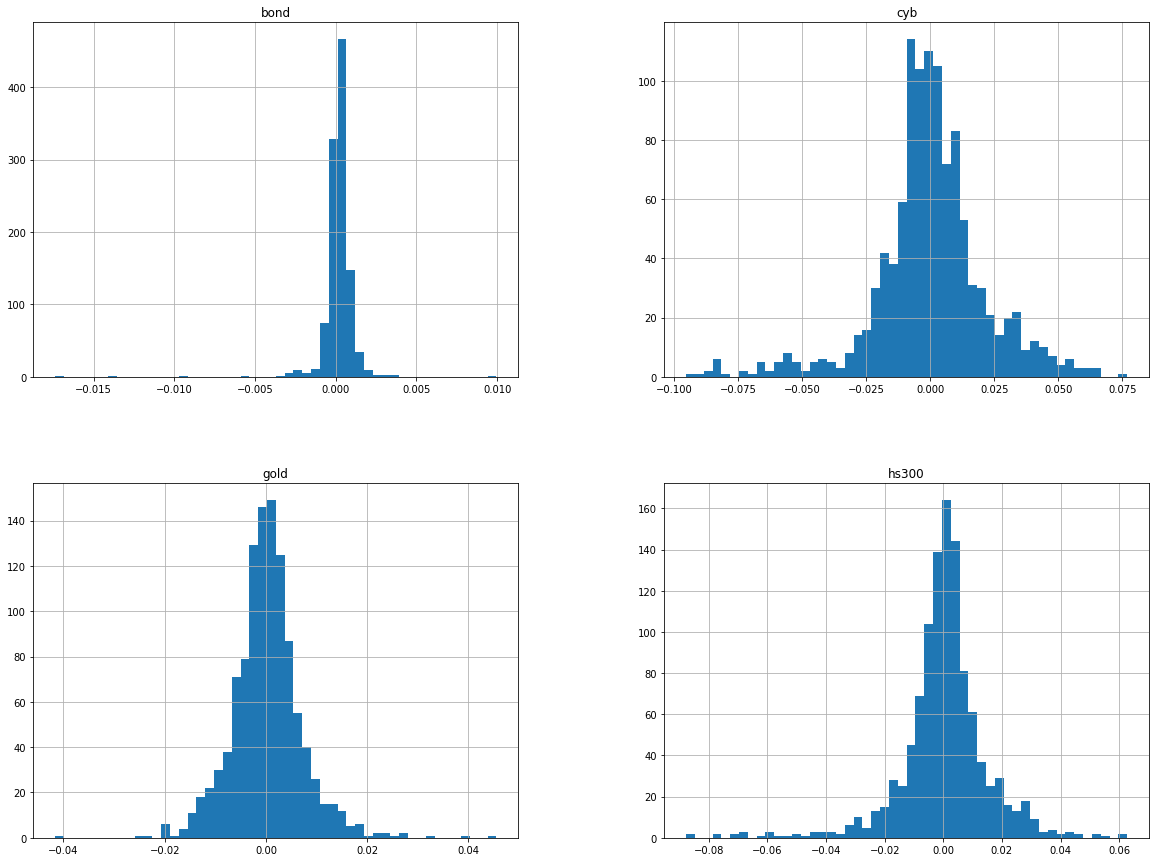

In [10]:
data_returns.hist(bins=50,figsize=(20,15))

In [8]:
prets = []
pvols = []

for p in range(2500):
    weights = np.random.random(4)
    weights /= np.sum(weights)
    prets.append(np.sum(data_returns[['gold','hs300','cyb','bond']].mean()* weights)* 52)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(data_returns[['gold','hs300','cyb','bond']].cov()*52,
                                                             weights))))
prets = np.array(prets)
pvols = np.array(pvols)

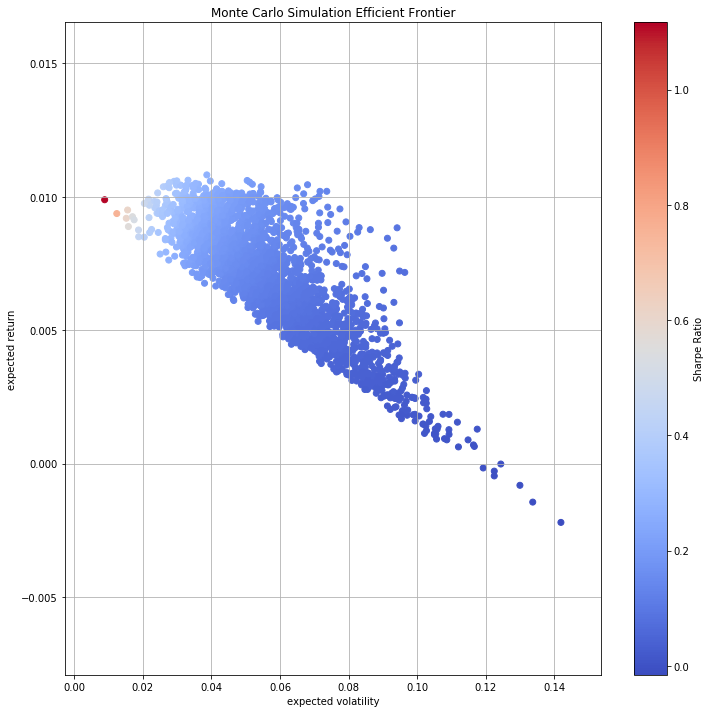

In [9]:
fig8 = plt.figure(figsize = (12,12))
plt.subplots_adjust(wspace=.5)
plt.subplot(111)

plt.scatter(pvols, prets, c = prets / pvols, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')
plt.savefig('Efficient_Frontier.png')